# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [5]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [6]:
df = pd.read_csv("Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

### **Checking the info of the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (4 Marks)

In [8]:
# Write your code here
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations:
1. CRIM has a wide range between max value and the other measures of central tendency which is an indicator that there are outliers. 
2. ZN too has outliers since there is a wide range between the max value and the mean.
3. INDUS also has outliers. which means non retail businesses are widely spread.
4. Tax is between 4-7%
5. Houses in boston have an average of 6 rooms
6. Pupil teacher ratio in boston is 19 pupils per teacher, which is an indicator that schools are not crowded.
7. On the average 25% if homes in Boston are occupied by ther owners owner

**


### **Univariate Analysis**

**Let's check the distribution of the variables**

### **Question 2:** Write your observations based on the below univariate plots. (4 Marks)

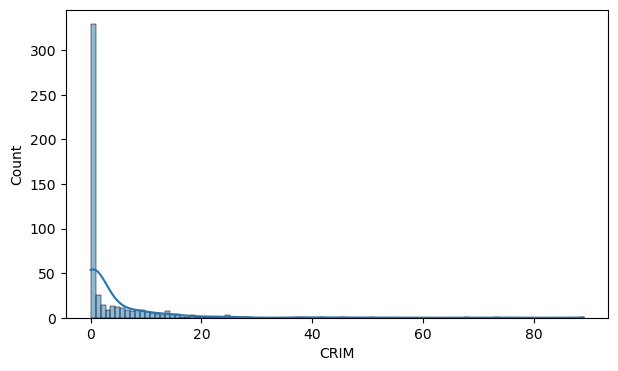

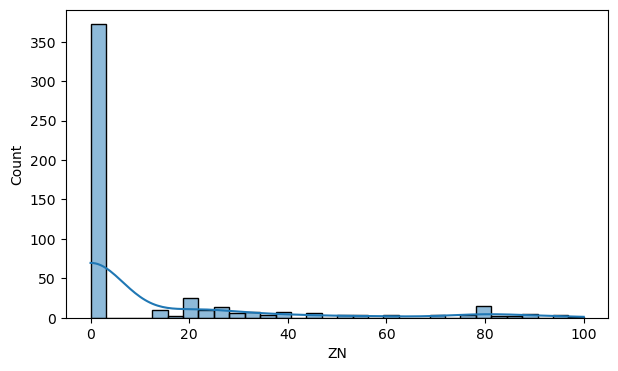

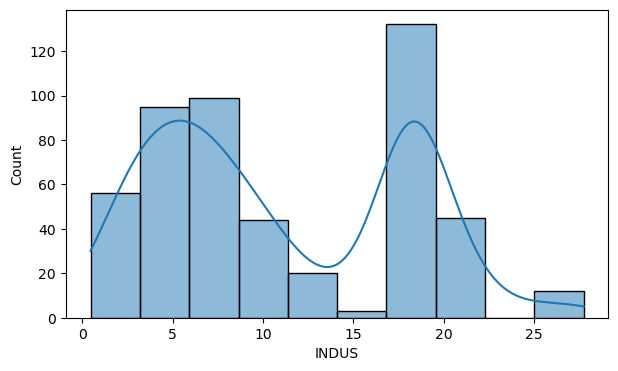

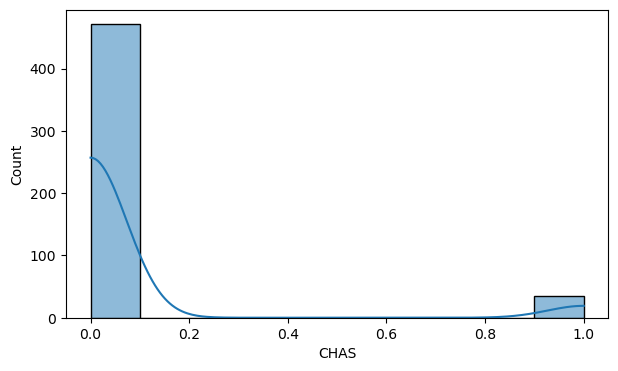

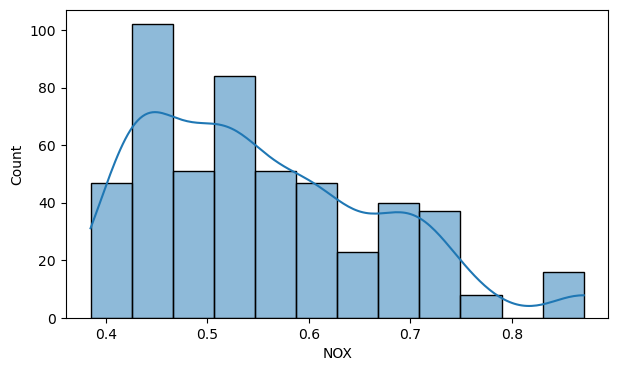

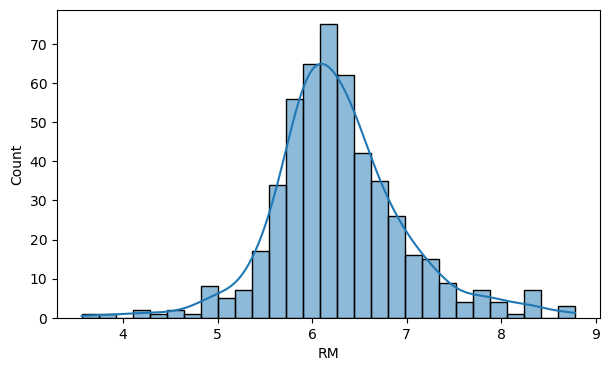

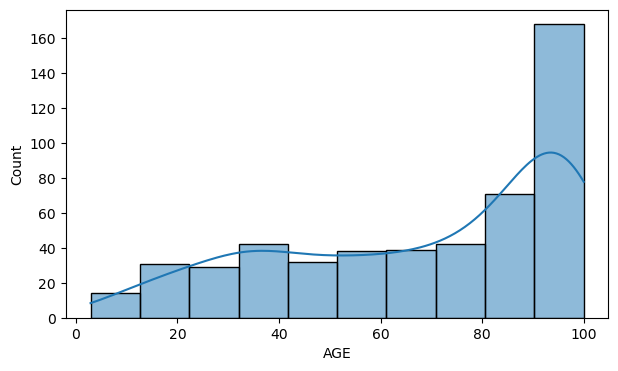

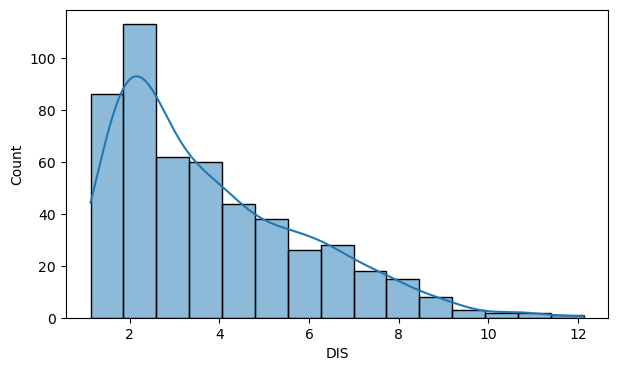

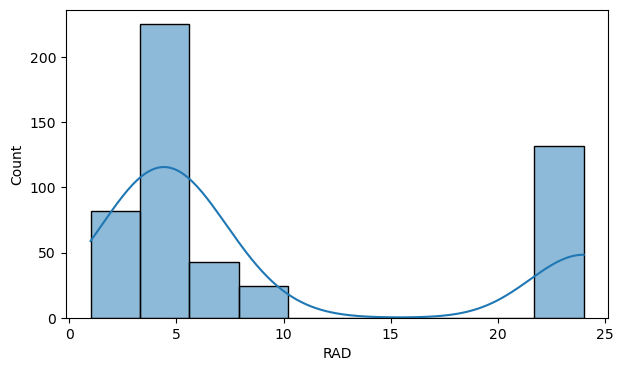

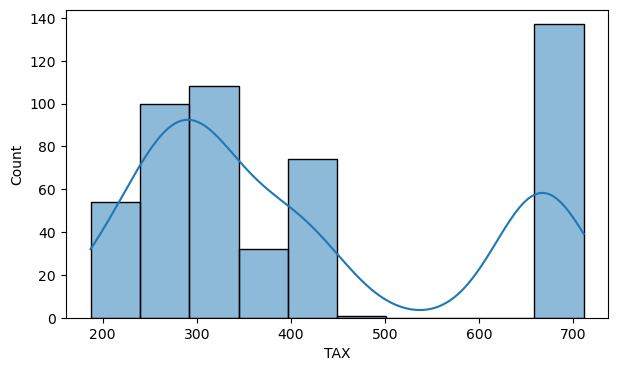

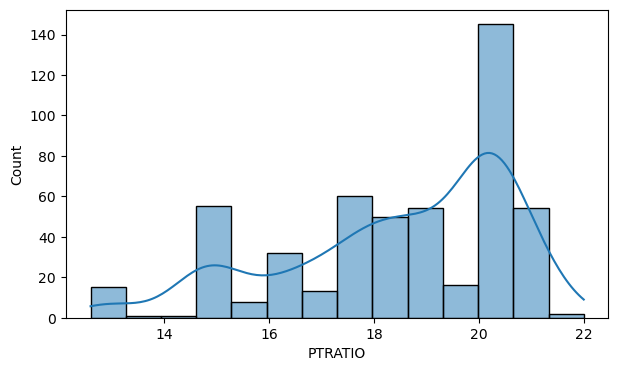

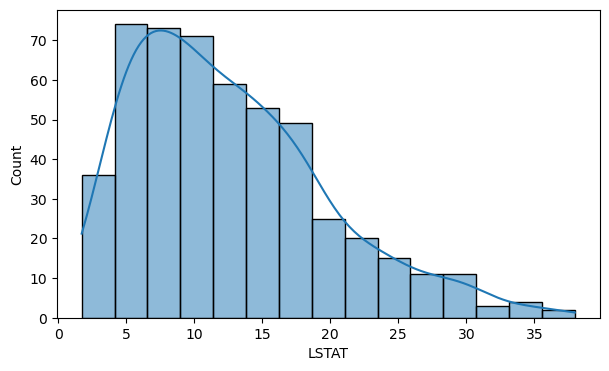

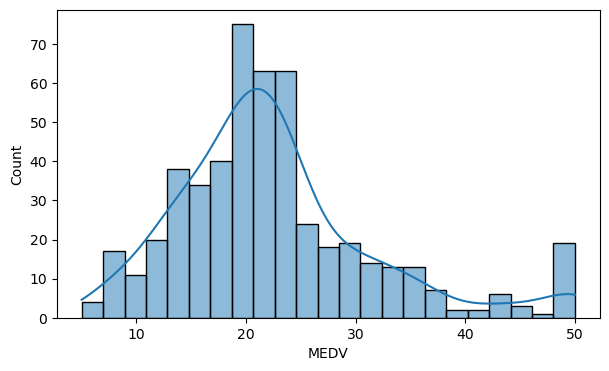

In [9]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

**Observations:
-The Crime rate in Boston Area in very low.
-The number of rooms per dwelling  is normally distributed with a median of 6 around rooms per dwelling.
-The pupil techer ratio is skewwed to the right with a median of 20 and a mean of 18.
-The variable NOX has a left skew which means pollution is low in most areas.
-The variable AGE has a right skew this is an indicator that most buidings are old.
-The median property value of owner ocuppied homes is 20,000 dollars vs a mean 22,000 dollars.
-The variable LSAT has a left Skew this indicates that poverty is low in the Boston area.**

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [19]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

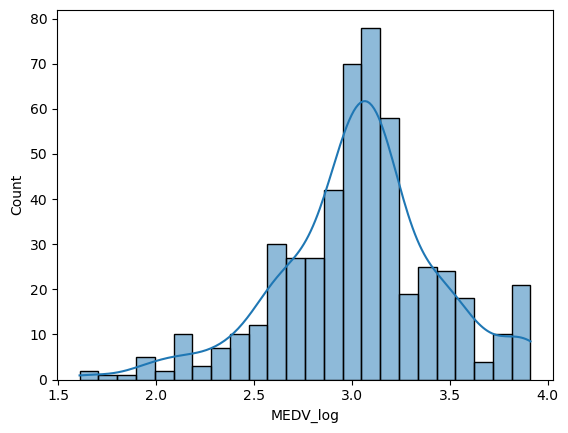

In [20]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly log-normal distribution with a very small skew to the right**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

### **Question 3:** Write the code to plot the correlation heatmap and write your observations based on that. (6 Marks)

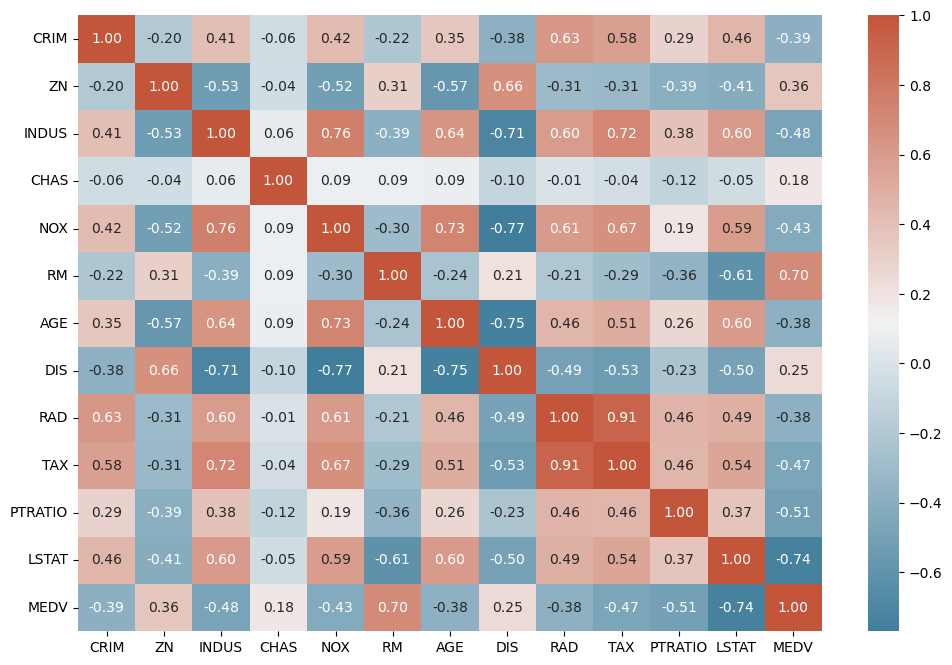

In [10]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:
1. There is a positive correlation between the varibles CRIM and TAX. 
2. A positive correlation exists between variables ZN and DIS.
3. There is a positive correlation between INDUS and NOX, AGE, RAD, TAX & PRATIO which highest count of  multiple correlation.
4. Nox also corelates positively across multiple variables.
5. RAD and Tax are highly corellated. 
6. Tax and LSAT are also corellated which shows. **

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

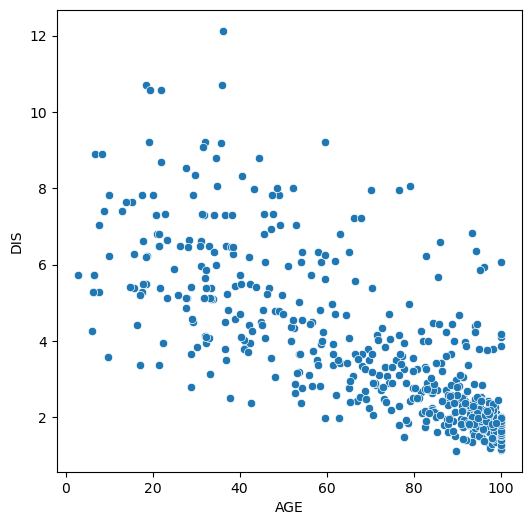

In [9]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
-The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located near the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.
-The graph also shows the presence of latent variables.

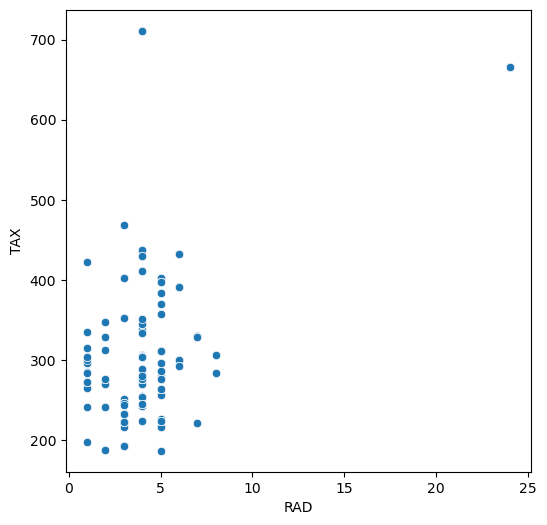

In [10]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**
-The correlation between RAD and TAX is very high. There is  no visible trend between the two variables. 
-The strong correlation might be due to outliers or the influence of a third variable. 

Let's check the correlation after removing the outliers.

In [11]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

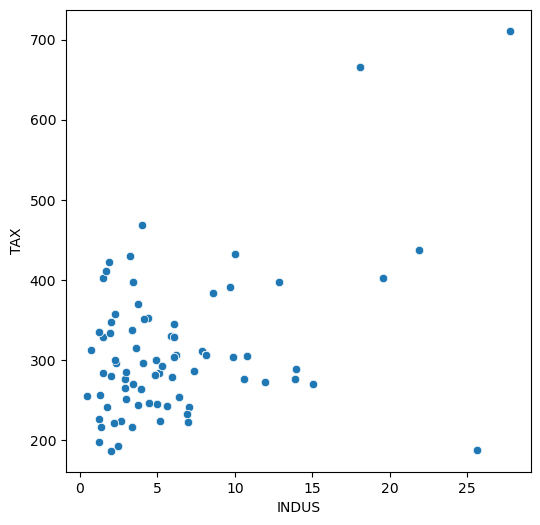

In [12]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This trend doesnot follow any specific pattern this might be due to external influence.

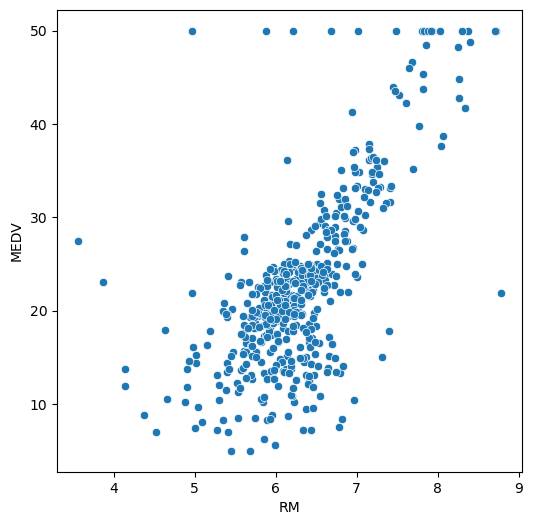

In [13]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the value of variable MEDV value seems to be capped at 50,000 dollars.

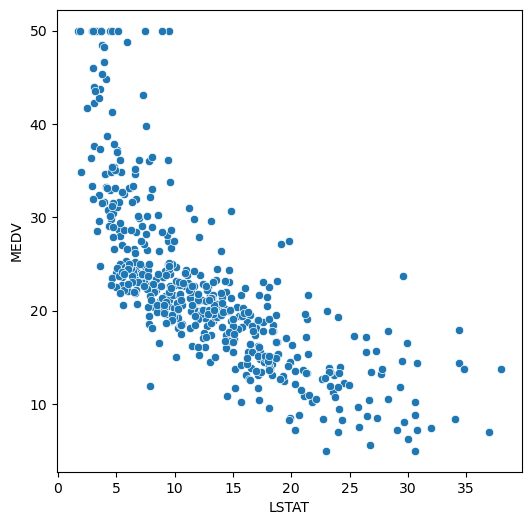

In [14]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers the value of the value MEDV seems to be capped at 50.

### **Question 4** (8 Marks):
- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7) (4 Marks)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots (4 Marks)**

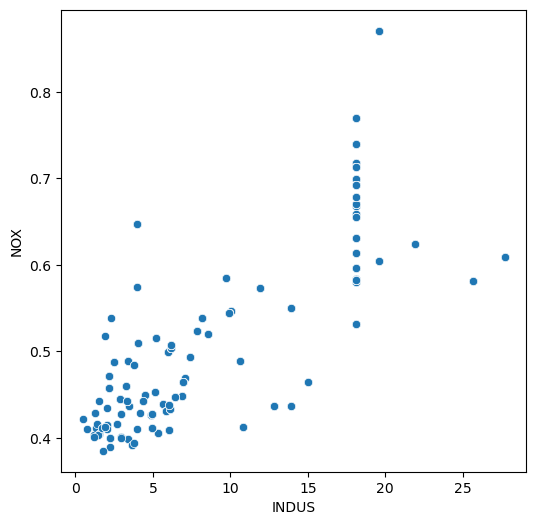

In [15]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

# Write you code here
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Observations:
1. There is a as NOX increases with an increase in INDUS, the plot has alot of outliers. It is an indicator that water pollution is high in areas that have more non-retail businesses**

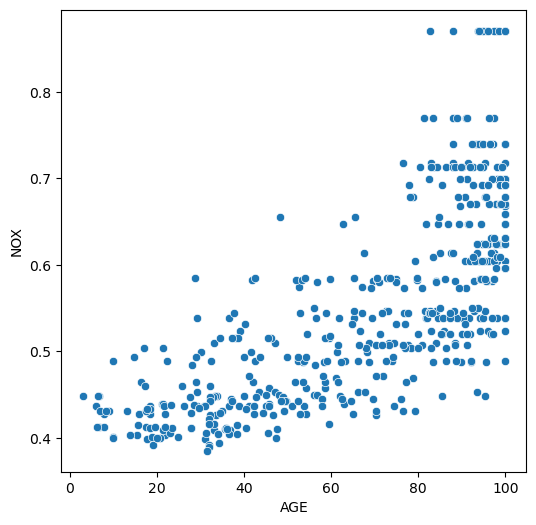

In [20]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

# Write your code here
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

**Observations:
-There is a positive relationship as AGE increases Nox  increases too.
-There are alot of outliers in the data,the nature of outliers support the positive reletionship between  the features. 
-This means that older houses are more exposed to water pollution. **

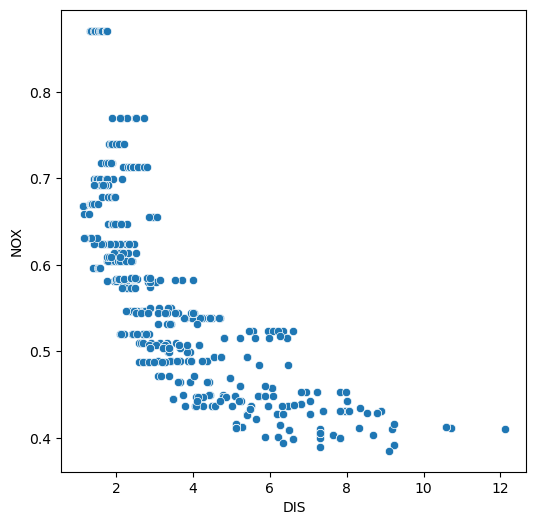

In [16]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

# Write your code here
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

**Observations: There is a negative relationship between NOX and DIS. As one moves further away from the employment centers there is less pollution in the water.**

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [21]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [22]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

### **Question 5:** Drop the column 'TAX' from the training data and check if multicollinearity is removed? (2 Marks)

In [24]:
# Create the model after dropping TAX
X_train # Check for VIF
X_train=X_train.drop(["TAX"], axis = 1)
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

### **Question 6:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (6 Marks)

**Hint:** Use the sm.OLS() model on the training data

In [25]:
X_train=X_train.drop(["TAX"], axis = 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          1.40e-101
Time:                        15:36:20   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations: 
-The r-squared and adjusted r- squared are high this means  the model is giving out enough information.
-There are two varibles whose P-value are more than 0.05 while most of them are below have a p-value less than 0.05 while others are close to zero.
-The conditions number is too large
-the model the threshhold of an optimally perfoming model.**

**Question 7:** Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again. (4 Marks)

 **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [26]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'],axis=1) # Write your code here

X = sm.add_constant(X)
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.61e-104
Time:                        15:36:36   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will check the linear regression assumptions.

**Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **Question 8:** Write the code to check the above linear regression assumptions and provide insights. (8 Marks)

 **1. Check for mean residuals**

In [27]:
residuals = model2.resid

np.mean(residuals)

-4.2295106525691695e-15

**Observations: The mean of the residuals is close to zero hence the assumptions about the model hold  **

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [28]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [29]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train,X_train)

lzip(name, test)

[('F statistic', 1.0835082923425285), ('p-value', 0.3019012006766869)]

**Observations: the p-value is more than 0.05 we reject the null hypothesis **

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

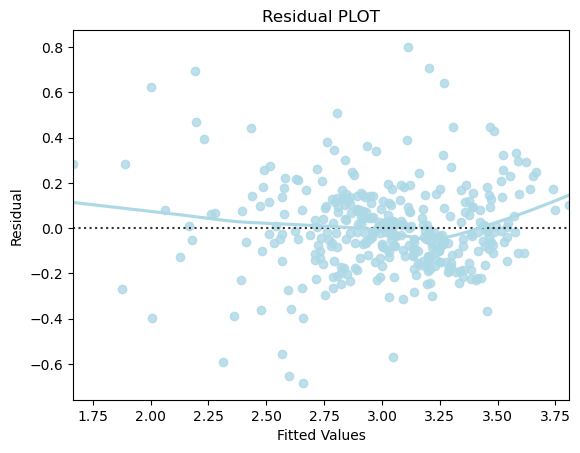

In [36]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x =fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations: The residuals are not symmetrically scatted across the X axis they form a funnel shape. This means we reject the null hypothesis**

### **4. Normality of error terms**

The residuals should be normally distributed.

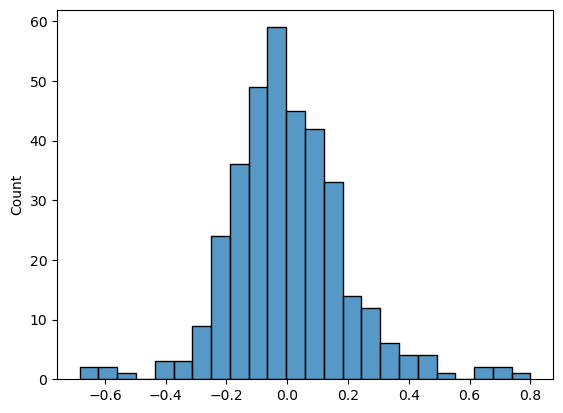

In [30]:
# Plot histogram of residuals
# Write your code here
sns.histplot(residuals);

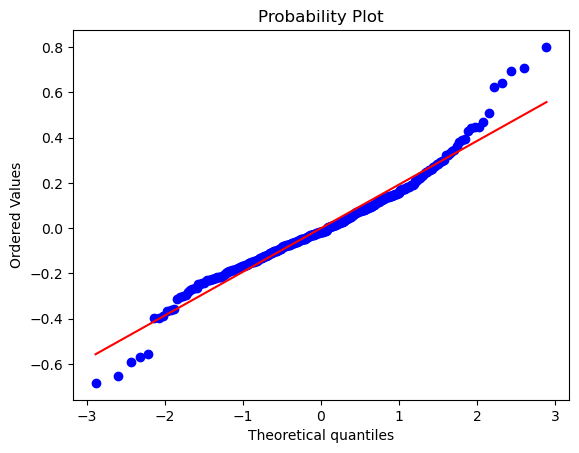

In [38]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations: 
-The residuals are  not-normally distributed the far ends of the reggression line indicates a much wider variance .
-The test for normalty holds **

### **Check the performance of the model on the train and test data set**

### **Question 9:** Write your observations by comparing model performance of train and test dataset (4 Marks)

In [1]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

NameError: name 'model2' is not defined

**Observations: 
-The model is generalized there is very little difference between its perfomance on the training data and its perfomance on the   test data 
-The mean absolute error is low on the training data but it increases by a small margin on the test data. .
-The root mean square error is also small in the training data then escalates by a small margin on the test set
-MAPE indicate a similar trend since it increases from 4.9% on th trained set to 5.2% on the test dataset. more importantly the error is low within acceptable levels**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [40]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


### **Question 10:** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (4 Marks)

**Hint:** To get values please use coef.values

In [84]:
coef = model2.params


pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [85]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = '')

log (Price) = 	( 4.649385823266653 ) *  const +( -0.012500455079103653 ) *  CRIM +( 0.1197731907701969 ) *  CHAS +( -1.0562253516683322 ) *  NOX +( 0.058906575109278984 ) *  RM +( -0.04406889079940582 ) *  DIS +( 0.007848474606243699 ) *  RAD +( -0.04850362079499884 ) *  PTRATIO +( -0.02927704047979712 ) *  LSTAT +

**Note:** There might be slight variation in the coefficients depending on the library version you are using. There will be no deducting in marks for that as long as your observations are aligned with the output. In case, the coefficients vary too much, please make sure your code is correct.

### **Question 11:** Write the conclusions and business recommendations derived from the model. (10 Marks)

Write Conclusions here
-We perfomed exploratory data analysis on the dataset to apreciate its structure and features we observed that all values were numeric in nature the dataset was complete.
-We then visualized the distribution of all the different variables using histograms.
-Checked for correlation between the variables and isolated variables with high correlation for  further analysis to understand the nature of this correlation.
-Dropped a few columns then used Variation Inflation Factor to check for multicollinearity in the data and dropped variable Tax to remove the multicollinearity.
-Developed the first model OLS model and checked for perfomance on the training data, noticed that some features were not statistically significant, those features were dropped to optimize the perfomance of the model.
-re-examined the perfomance of the new model2 on training data and test data the model depicted a generalized perfomances in both cases with a small Mean Absolute percentage Error of 5.2% on the test set. 
-we check for the regression assumptions and applied cross validation to improve the perfomance of the model
-conclude that the varibles RM,RAD and CHASE have the highest deteminants of price of a house in boston.


Write Recommendations here
 -Houses with high number of rooms, have a high index of accessibility to radial highways and are not close to rivers have fetch higher prices in the Boston Area.
-This model can guide developers on the characterictics of residential properties to develop in the Boston Area.
-This model can be used by valuers to value properties for various uses. 
-This model can be used by homeowners to anticipate the future value of their properties.
-This model can be used by future home owners on where to look and what to look at when purchasing a house.  